In [1]:
from classes import *

In [2]:

"""
Simulation parameters
"""
p_sim = {}
p_sim['n_samples'] = 1000
p_sim['n_features'] = 25
p_sim['beta'] = [0.01 * (p_sim['n_features'] - i) / p_sim['n_features']
                 for i in range(0, p_sim['n_features'])]
p_sim['alpha'] = 3
p_sim['lamb'] = 1
p_sim['coef_tt'] = 1.8
p_sim['rho'] = 0.0
p_sim['kappa'] = 3.
p_sim['wd_param'] = 3. #4.
p_sim['scheme'] = 'linear'#'linear'
p_sim['path_data'] = "./sim_surv"

"""
Model parameters
"""

p_survcaus = {}
p_survcaus['num_durations'] = 25
p_survcaus['encoded_features'] = 20
p_survcaus['alpha_wass'] = 1
p_survcaus['batch_size'] = 256
p_survcaus['epochs'] = 100
p_survcaus['lr'] = 1e-2
p_survcaus['patience'] = 10


In [3]:
p_survcaus

{'num_durations': 25,
 'encoded_features': 20,
 'alpha_wass': 1,
 'batch_size': 256,
 'epochs': 100,
 'lr': 0.01,
 'patience': 10}

In [4]:
# Simulation of data
simu = Simulation(p_sim)
data = simu.simulation_surv()
data


WD =  28.673065185546875
tt = 1 : 58 % 
event = 1 : 72 %


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,tt,T_f_cens,event,T_1,T_0,T_f,T_cf,Xbeta
0,2.145819,2.175174,2.470704,2.384804,2.409066,2.323593,1.986710,2.120994,2.143512,1.900370,...,2.413149,1.501059,0,0.032163,0,0.672074,0.851378,0.851378,0.672074,0.080230
1,-0.585410,-0.602982,-0.771868,-1.184985,-0.778074,-0.858666,-1.302494,-1.182381,-1.382650,-1.410660,...,-0.980268,-1.483615,1,0.383053,1,0.383053,0.919186,0.383053,0.919186,0.065545
2,-1.392987,-0.959730,-0.744736,-1.033231,-0.763651,-0.940489,-0.862541,-1.167458,-0.906428,-1.499022,...,-0.891565,-1.069354,1,0.293516,0,0.608427,1.313692,0.608427,1.313692,0.062081
3,-1.233989,-1.148994,-0.696245,-0.647030,-0.955573,-0.822752,-0.629675,-0.979987,-0.670029,-1.271421,...,-0.888668,-1.346293,1,0.598745,1,0.598745,0.664765,0.598745,0.664765,0.078397
4,-0.845589,-0.734202,-0.614543,-0.634898,-0.953331,-0.739801,-0.675881,-0.697443,-1.286992,-1.138119,...,-1.465836,-0.622105,1,0.371740,1,0.371740,0.659817,0.371740,0.659817,0.082924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.504416,2.065135,1.725711,2.140419,2.279788,2.200288,1.551805,1.950627,1.945627,2.150022,...,1.860878,1.526305,0,0.090104,0,0.469238,0.955814,0.955814,0.469238,0.059138
996,1.751287,2.397441,2.170611,2.081917,1.692633,2.374418,1.982575,2.471021,1.665040,1.616659,...,2.072059,1.607141,0,0.378481,1,0.384145,0.378481,0.378481,0.384145,0.065780
997,-1.030496,-1.067486,-0.878140,-0.857998,-0.946702,-0.756545,-1.141426,-0.984454,-1.112608,-1.021537,...,-1.384496,-0.542621,1,0.310561,1,0.310561,0.554515,0.310561,0.554515,0.068491
998,1.781817,2.229811,1.738277,2.369176,1.606468,2.344844,1.634712,2.012455,2.090624,2.301441,...,2.112104,1.636857,0,0.822478,0,0.736927,1.032298,1.032298,0.736927,0.064246


In [5]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,tt,T_f_cens,event,T_1,T_0,T_f,T_cf,Xbeta
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.238952,0.243297,0.236968,0.222116,0.231245,0.216179,0.226672,0.232265,0.228932,0.240060,...,0.249221,0.233288,0.589000,0.527756,0.72300,0.481902,0.890353,0.650179,0.722076,0.065013
std,1.481808,1.540901,1.475710,1.525243,1.491931,1.535089,1.481405,1.509811,1.488390,1.517060,...,1.518908,1.518770,0.492261,0.309600,0.44774,0.182170,0.306652,0.311301,0.333505,0.008584
min,-1.496750,-1.497554,-1.495847,-1.496821,-1.498365,-1.497158,-1.498988,-1.495818,-1.497443,-1.499946,...,-1.497908,-1.499997,0.000000,0.001235,0.00000,0.040573,0.124038,0.042167,0.040573,0.033238
25%,-1.027511,-1.109680,-1.037958,-1.115612,-1.057196,-1.136083,-1.067730,-1.082054,-1.062251,-1.091216,...,-1.074966,-1.068167,0.000000,0.301281,0.00000,0.345921,0.674258,0.421883,0.479745,0.059618
50%,-0.634992,-0.672908,-0.635294,-0.674176,-0.639218,-0.688009,-0.651648,-0.651733,-0.636444,-0.645696,...,-0.644890,-0.682246,1.000000,0.488976,1.00000,0.487634,0.881795,0.601172,0.673514,0.064912
75%,1.863665,1.978302,1.861214,1.904996,1.849164,1.927033,1.839988,1.887080,1.856473,1.920319,...,1.948104,1.894998,1.000000,0.697168,1.00000,0.615526,1.090067,0.836160,0.940954,0.070727
max,2.499465,2.496168,2.475123,2.499105,2.489131,2.499229,2.499702,2.499049,2.499587,2.499953,...,2.498855,2.497516,1.000000,1.637611,1.00000,1.032896,1.761934,1.680567,1.761934,0.090079


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.353s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.538850
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.769516
[t-SNE] KL divergence after 1000 iterations: 1.960282


<ipython-input-6-1ba9db191df6>:16: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



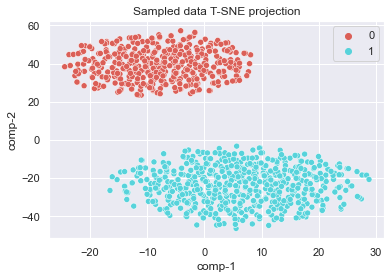

In [6]:
# TSNE
from sklearn.manifold import TSNE

x = data.iloc[:, :p_sim['n_features']]
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)
d = pd.DataFrame()
d["tt"] = data[['tt']].values.squeeze()
d["comp-1"] = z[:, 0]
d["comp-2"] = z[:, 1]

fig = plt.figure()
sns.scatterplot(x="comp-1", y="comp-2", hue=d.tt.tolist(),
            palette=sns.color_palette("hls", 2),
            data=d).set(title="Sampled data T-SNE projection")
fig.show()


In [7]:
# Tunning og hyperparameters

tunning = Tunning(p_sim)
p_survcaus_best = tunning.get_best_hyperparameter(n_trials=1)  #1000
p_survcaus_best

[I 2021-11-10 08:50:59,382] A new study created in memory with name: no-name-ad805a5a-12ef-49b9-8b98-4957ab6ed6ac


0:	[0s / 0s],		train_loss: 2.4159,	train_loss_surv: 2.4102,	train_loss_wass: 0.0010,	val_loss: 2.4349,	val_loss_surv: 2.4316,	val_loss_wass: 0.0006
1:	[0s / 0s],		train_loss: 2.4480,	train_loss_surv: 2.4437,	train_loss_wass: 0.0007,	val_loss: 2.4320,	val_loss_surv: 2.4292,	val_loss_wass: 0.0005
2:	[0s / 0s],		train_loss: 2.3480,	train_loss_surv: 2.3449,	train_loss_wass: 0.0005,	val_loss: 2.4290,	val_loss_surv: 2.4267,	val_loss_wass: 0.0004
3:	[0s / 0s],		train_loss: 2.3154,	train_loss_surv: 2.3124,	train_loss_wass: 0.0005,	val_loss: 2.4258,	val_loss_surv: 2.4237,	val_loss_wass: 0.0004
4:	[0s / 0s],		train_loss: 2.3158,	train_loss_surv: 2.3132,	train_loss_wass: 0.0005,	val_loss: 2.4221,	val_loss_surv: 2.4204,	val_loss_wass: 0.0003
5:	[0s / 0s],		train_loss: 2.3017,	train_loss_surv: 2.2996,	train_loss_wass: 0.0004,	val_loss: 2.4176,	val_loss_surv: 2.4161,	val_loss_wass: 0.0002
6:	[0s / 0s],		train_loss: 2.2108,	train_loss_surv: 2.2086,	train_loss_wass: 0.0004,	val_loss: 2.4123,	val_loss_

  0%|          | 0/200 [00:00<?, ?it/s]

18:	[0s / 2s],		train_loss: 2.1045,	train_loss_surv: 2.1031,	train_loss_wass: 0.0002,	val_loss: 2.2987,	val_loss_surv: 2.2978,	val_loss_wass: 0.0002
19:	[0s / 2s],		train_loss: 2.1141,	train_loss_surv: 2.1130,	train_loss_wass: 0.0002,	val_loss: 2.2924,	val_loss_surv: 2.2916,	val_loss_wass: 0.0002


100%|██████████| 200/200 [00:00<00:00, 590.96it/s]
[I 2021-11-10 08:51:03,118] Trial 0 finished with value: 0.06353843539369088 and parameters: {'num_durations': 24, 'encoded_features': 20, 'alpha_wass': 5.77903772258693, 'lr': 0.00047033061368040985}. Best is trial 0 with value: 0.06353843539369088.


{'num_durations': 24,
 'encoded_features': 20,
 'alpha_wass': 5.77903772258693,
 'lr': 0.00047033061368040985}

SurvCaus
{'num_durations': 24, 'encoded_features': 20, 'alpha_wass': 5.77903772258693, 'lr': 0.00047033061368040985, 'patience': 4, 'epochs': 20, 'batch_size': 256}
0:	[0s / 0s],		train_loss: 2.4788,	train_loss_surv: 2.4750,	train_loss_wass: 0.0007,	val_loss: 2.4727,	val_loss_surv: 2.4699,	val_loss_wass: 0.0005
1:	[0s / 0s],		train_loss: 2.4201,	train_loss_surv: 2.4164,	train_loss_wass: 0.0006,	val_loss: 2.4732,	val_loss_surv: 2.4704,	val_loss_wass: 0.0005
2:	[0s / 0s],		train_loss: 2.3603,	train_loss_surv: 2.3566,	train_loss_wass: 0.0006,	val_loss: 2.4731,	val_loss_surv: 2.4705,	val_loss_wass: 0.0005
3:	[0s / 0s],		train_loss: 2.3044,	train_loss_surv: 2.3011,	train_loss_wass: 0.0006,	val_loss: 2.4727,	val_loss_surv: 2.4703,	val_loss_wass: 0.0004
4:	[0s / 0s],		train_loss: 2.3075,	train_loss_surv: 2.3047,	train_loss_wass: 0.0005,	val_loss: 2.4717,	val_loss_surv: 2.4696,	val_loss_wass: 0.0004
5:	[0s / 0s],		train_loss: 2.2609,	train_loss_surv: 2.2589,	train_loss_wass: 0.0004,	val_loss: 

 24%|██▍       | 48/200 [00:00<00:00, 468.05it/s]

19:	[0s / 2s],		train_loss: 2.1711,	train_loss_surv: 2.1696,	train_loss_wass: 0.0003,	val_loss: 2.3665,	val_loss_surv: 2.3655,	val_loss_wass: 0.0002


100%|██████████| 200/200 [00:00<00:00, 524.34it/s]


SurvCaus_0
{'num_durations': 24, 'encoded_features': 20, 'alpha_wass': 0.0, 'lr': 0.00047033061368040985, 'patience': 4, 'epochs': 20, 'batch_size': 256}
0:	[0s / 0s],		train_loss: 2.4537,	train_loss_surv: 2.4537,	train_loss_wass: 0.0006,	val_loss: 2.4241,	val_loss_surv: 2.4241,	val_loss_wass: 0.0006
1:	[0s / 0s],		train_loss: 2.4867,	train_loss_surv: 2.4867,	train_loss_wass: 0.0006,	val_loss: 2.4228,	val_loss_surv: 2.4228,	val_loss_wass: 0.0005
2:	[0s / 0s],		train_loss: 2.3271,	train_loss_surv: 2.3271,	train_loss_wass: 0.0007,	val_loss: 2.4219,	val_loss_surv: 2.4219,	val_loss_wass: 0.0005
3:	[0s / 0s],		train_loss: 2.3549,	train_loss_surv: 2.3549,	train_loss_wass: 0.0005,	val_loss: 2.4211,	val_loss_surv: 2.4211,	val_loss_wass: 0.0005
4:	[0s / 0s],		train_loss: 2.3208,	train_loss_surv: 2.3208,	train_loss_wass: 0.0006,	val_loss: 2.4203,	val_loss_surv: 2.4203,	val_loss_wass: 0.0006
5:	[0s / 0s],		train_loss: 2.3107,	train_loss_surv: 2.3107,	train_loss_wass: 0.0007,	val_loss: 2.4183,	val

100%|██████████| 200/200 [00:00<00:00, 363.06it/s]


CoxPH
Performing Newton-Raphson optimization
 * Iteration #1 - Loss = 769.573 - ||grad||^2 = 193.26207
 * Iteration #2 - Loss = 739.485 - ||grad||^2 = 172.84853
 * Iteration #3 - Loss = 718.393 - ||grad||^2 = 155.00527
 * Iteration #4 - Loss = 702.703 - ||grad||^2 = 139.21602
 * Iteration #5 - Loss = 690.629 - ||grad||^2 = 125.15408
 * Iteration #6 - Loss = 681.137 - ||grad||^2 = 112.58253
 * Iteration #7 - Loss = 673.571 - ||grad||^2 = 101.31593
 * Iteration #8 - Loss = 667.483 - ||grad||^2 = 91.20232
 * Iteration #9 - Loss = 662.551 - ||grad||^2 = 82.11355
 * Iteration #10 - Loss = 658.540 - ||grad||^2 = 73.93937
 * Iteration #11 - Loss = 655.268 - ||grad||^2 = 66.58375
 * Iteration #12 - Loss = 652.593 - ||grad||^2 = 59.96220
 * Iteration #13 - Loss = 650.404 - ||grad||^2 = 53.99990
 * Iteration #14 - Loss = 648.611 - ||grad||^2 = 48.63030
 * Iteration #15 - Loss = 647.143 - ||grad||^2 = 43.79396
 * Iteration #16 - Loss = 645.941 - ||grad||^2 = 39.43767
 * Iteration #17 - Loss = 644

  0%|          | 0/200 [00:00<?, ?it/s]

 * Iteration #100 - Loss = 1283.873 - ||grad||^2 = 0.00941
Converged after 100 iterations.


100%|██████████| 200/200 [00:03<00:00, 57.61it/s] 


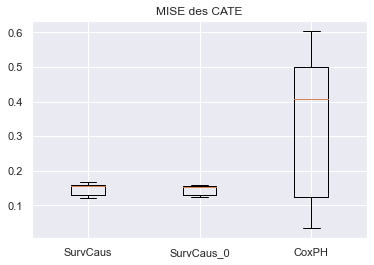

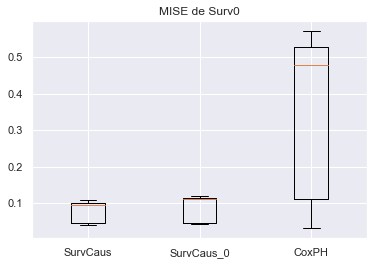

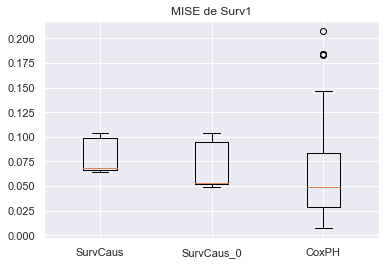

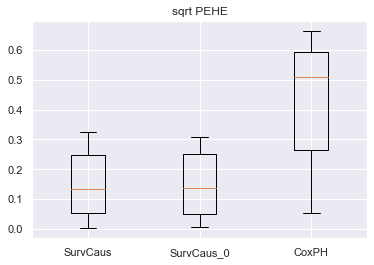

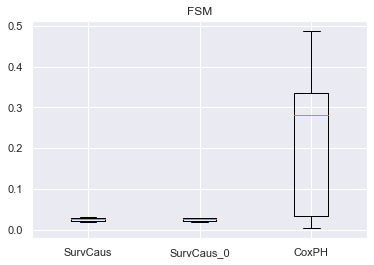

In [8]:
# Evaluation - benchmark

p_survcaus = p_survcaus_best.copy()

p_survcaus['patience'] = 4
p_survcaus['epochs']=20
p_survcaus['batch_size']=256


Ev = Evaluation(p_sim, p_survcaus)
Ev.All_Results(list_models=["SurvCaus", "SurvCaus_0",'CoxPH'],
               is_train=False)      # , 'CoxPH', 'BART'

In [9]:

# Bilan of benchmark
Ev.bilan_benchmark


,models,Mise0,Mise1,CATE,PEHE,FSM
0,SurvCaus,"(0.076, 0.027)","(0.08, 0.016)","(0.147, 0.015)","(0.147, 0.105)","(0.025, 0.003)"
1,SurvCaus_0,"(0.086, 0.033)","(0.07, 0.021)","(0.145, 0.013)","(0.146, 0.102)","(0.024, 0.004)"
2,CoxPH,"(0.351, 0.207)","(0.059, 0.041)","(0.337, 0.187)","(0.431, 0.192)","(0.211, 0.153)"


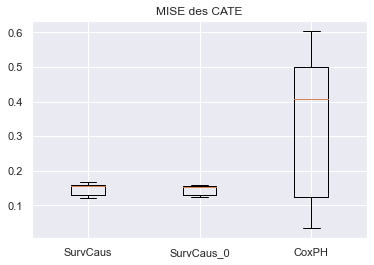

In [10]:
Ev.box_plot_cate

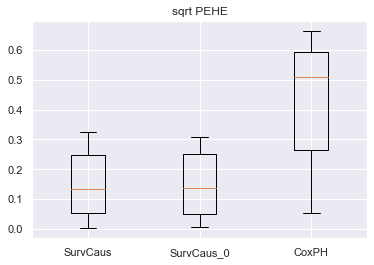

In [11]:
Ev.box_plot_pehe

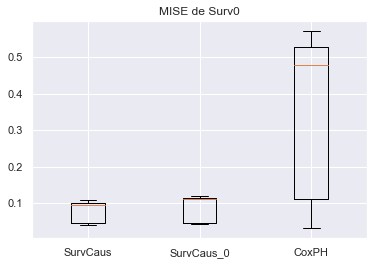

In [12]:
Ev.box_plot_surv0

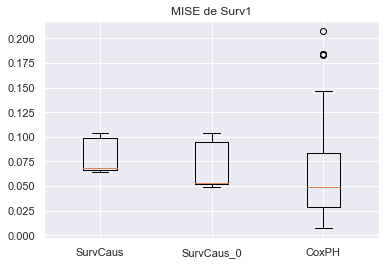

In [13]:
Ev.box_plot_surv1

(p_ours,p_bench) = (19, 62)
(p_ours,p_bench) = (19, 94)


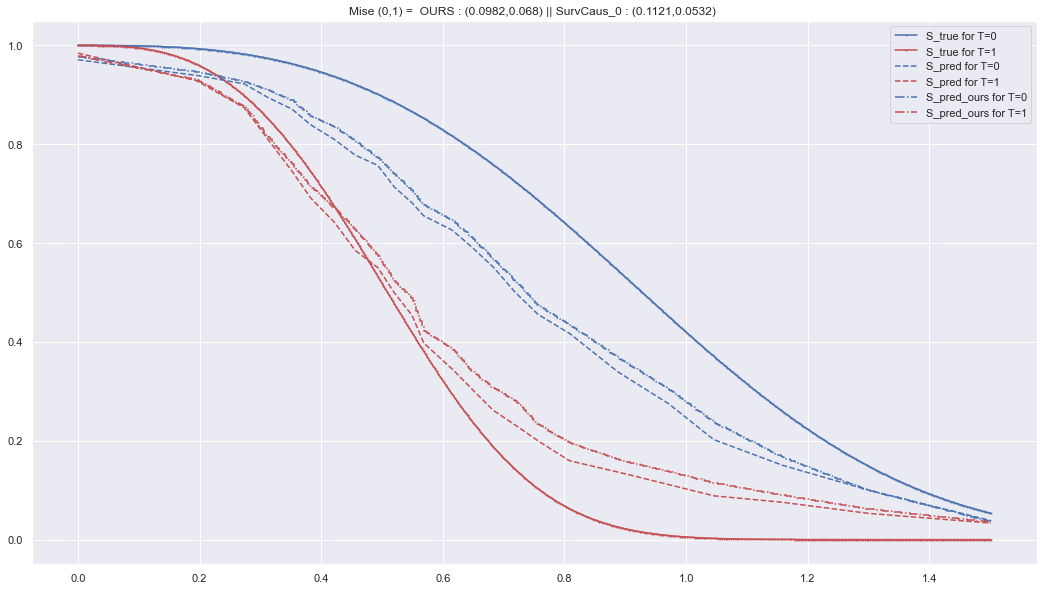

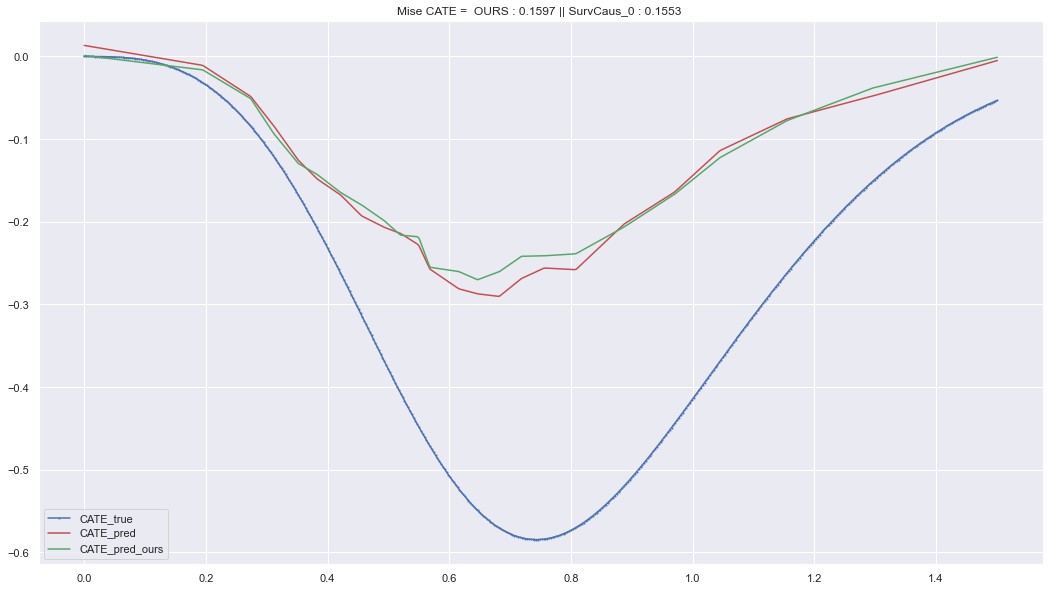

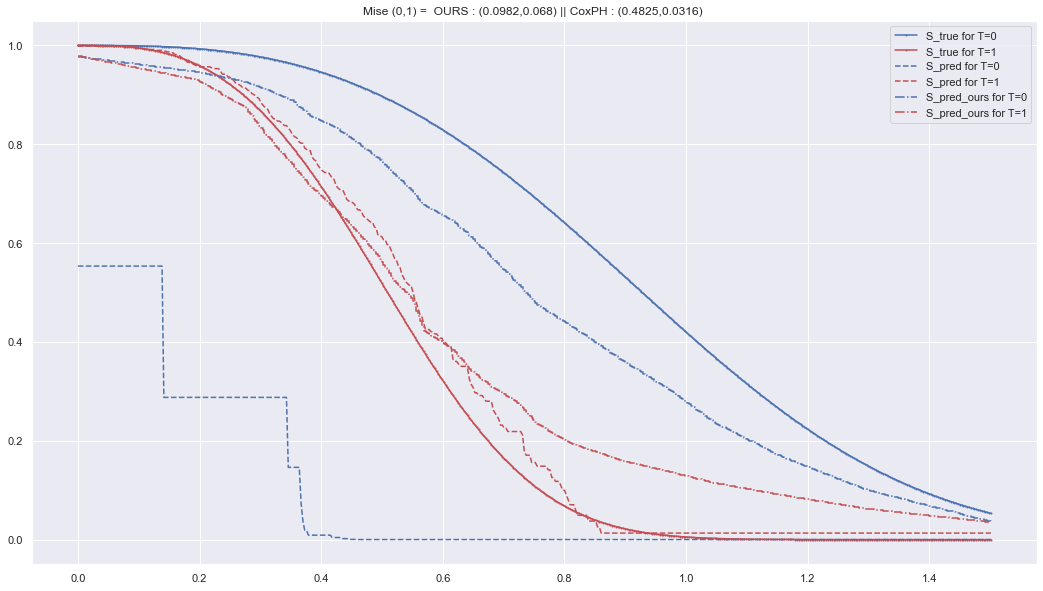

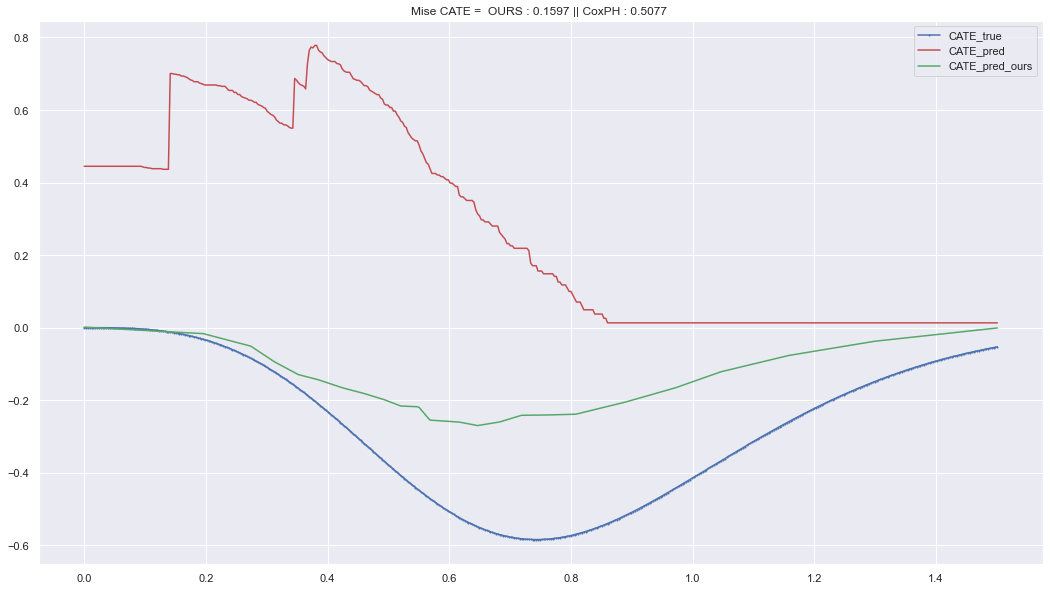

In [14]:

patient = 67
%matplotlib inline

for model_name in Ev.list_models[1:] :
    fig_surv,fig_cate = plots(patient, Ev.d_list_models, model_name)

